In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd

In [3]:
meq = pd.read_csv('Noticias/MEQ_tweets.csv')
meq.head(3)

,created_at,id,user_id,screen_name,followers_count,friend_count,in_reply_to_user_id,in_reply_to_screen_name,text,time
0,2022-01-05 23:07:59+00:00,1.478866e+18,1.437082e+09,SilvanaGonz0paz,149.0,149.0,NaN,NaN,RT @crisbravocastro: Felices estamos los Mauli...,2022-01-05 23:07:59+00:00
1,2022-01-06 13:02:22+00:00,1.479076e+18,8.057368e+08,eligop,1735.0,2322.0,NaN,NaN,RT @candanga_angela: 🔴Noticia🔴📰:\n\nMaría Elis...,2022-01-06 13:02:22+00:00
2,2022-01-05 21:16:18+00:00,1.478838e+18,4.056768e+09,kensselrojas,3808.0,4186.0,NaN,NaN,RT @DiaguitaConsti1: Felicitar María Elisa Qui...,2022-01-05 21:16:18+00:00


In [4]:
meq.iloc[0].text

'RT @crisbravocastro: Felices estamos los Maulin@s!! Felicitaciones a la Dra María Elisa Quinteros, mujer joven talquina!! Electa presidenta…'

In [5]:
%%time
# Esto crea un dataframe basado en los retweet de la forma usuario1 retweetea a usuario2
df_rt = meq[meq['text'].str.contains("RT @")]
rt_dict = {}
ls_pares = []
for _, row in df_rt.iterrows():
    txt = row['text'].split(':')[0]
    rt_user = txt.split('@')[-1]
    try:
        pair = sorted([row.screen_name, rt_user])
        if pair[0] != pair[1]:
            pair[0] = str(pair[0])
            pair[1] = str(pair[1])
            key = ' '.join(pair)
            ls_pares.append(pair[0] + " " + pair[1])
            if key not in rt_dict:
                rt_dict[key] = 0
            rt_dict[key] += 1
    except:
        pass
df_pares = pd.DataFrame(ls_pares, columns=['users'])

users_cant = df_pares.groupby('users').size().reset_index(name='counts')
df_cant_pares = users_cant[users_cant['counts'] > 0]
ls_users = []

df_usuarios = df_cant_pares['users'].str.split(' ', expand=True).rename({0: 'user1', 1: 'user2'}, axis=1)
df_usuarios

Wall time: 1.78 s


,user1,user2
0,001ODEJA_VU0101,mcubillossigall
1,0324Marta,TERE_LAprofe73
2,0324Marta,luisadgallardo
3,0324Marta,paulacabezas56
4,08_sweetheart_,cdentistaschile
...,...,...
28682,valenzuelalevi,vonAlfward
28683,valenzuelalevi,wladi9
28684,valenzuelalevi,xBorisEsteban
28685,valenzuelalevi,yoopino_dtodo


In [6]:
df_usuarios.to_csv('Edges/MEQ_usuarios_edges.csv', index=False)

In [7]:
len(set(df_usuarios.user1.to_list() + df_usuarios.user2.to_list()))

13127

In [8]:
usuarios = list(set(df_usuarios.user1.to_list() + df_usuarios.user2.to_list()))

In [9]:
G = nx.from_pandas_edgelist(df_usuarios, 'user1', 'user2', create_using=nx.Graph())
G.add_nodes_from(usuarios)

In [10]:
len(G.nodes)

13127

In [11]:
nodos_eliminar = []
for node in G.nodes:
    if len(list(nx.all_neighbors(G, node))) < 10:
        nodos_eliminar.append(node)
for n in nodos_eliminar:
    G.remove_node(n)

In [12]:
nodes_ls = []
for component in list(nx.connected_components(G)):
    if len(component) < 40:
        for node in component:
            nodes_ls.append(node)
            G.remove_node(node)

In [13]:
len(G.nodes)

727

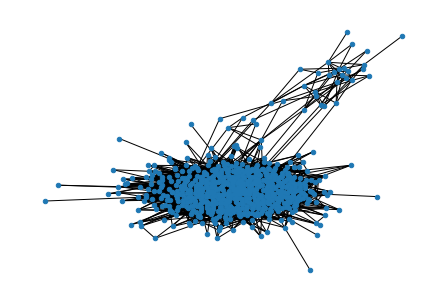

In [14]:
nx.draw(G, with_labels=False, node_size = 20)